In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.model_selection import train_test_split
from scipy.stats import entropy

# own lib
from src.utils import load_from_sktime_univariate, plot_embedding, distance_time_warping

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
dataset_name = "HandOutlines"

# load dataset
X_train, y_train = load_from_sktime_univariate(
    f"data/{dataset_name}/{dataset_name}_TRAIN.ts"
)
X_test, y_test = load_from_sktime_univariate(
    f"data/{dataset_name}/{dataset_name}_TEST.ts"
)

# flatten time series
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

# # balance instances on training - only some datasets
# X_train, X_test, y_train, y_test = train_test_split(np.concatenate([X_train, X_test]),
#                                                     np.concatenate([y_train, y_test]),
#                                                     test_size=.66, random_state=17)

# remove instances on training - only some specific datasets
X_train, _, y_train, _ = train_test_split(X_train, y_train,
                                          train_size=.1, random_state=17)

normalized_entropy = entropy(np.unique(y_train, return_counts=True)[1]) / entropy([1 for i in range(len(np.unique(y_train)))])
print(f"Normalized Entropy: {normalized_entropy:4f}")

# silhouette raw time series
silhouette_raw_train = silhouette_score(X_train, y_train)
silhouette_raw_test = silhouette_score(X_test, y_test)

print(f"Train Silhouette: {silhouette_raw_train:.4f}")
print(f"Test Silhouette: {silhouette_raw_test:.4f}")

Normalized Entropy: 0.950672
Train Silhouette: 0.2336
Test Silhouette: 0.2118


## Plot raw training and test set

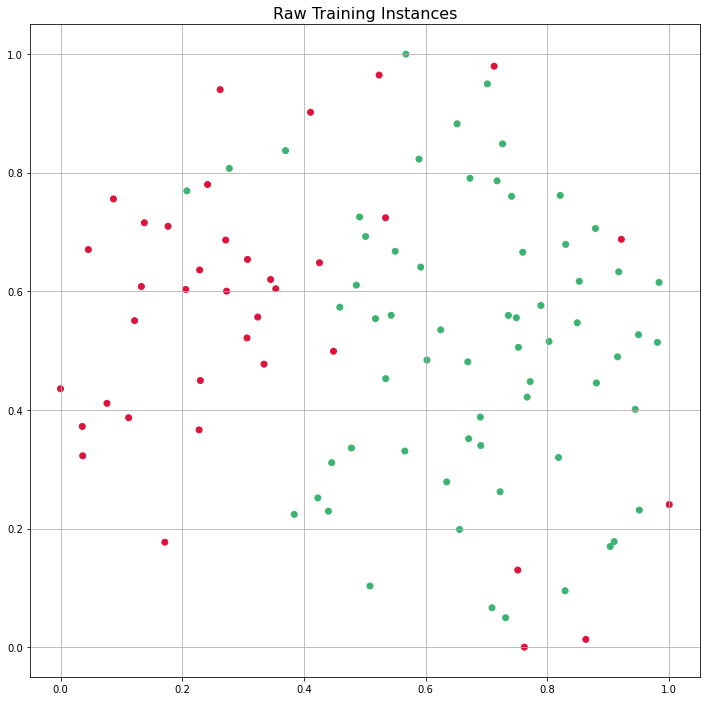

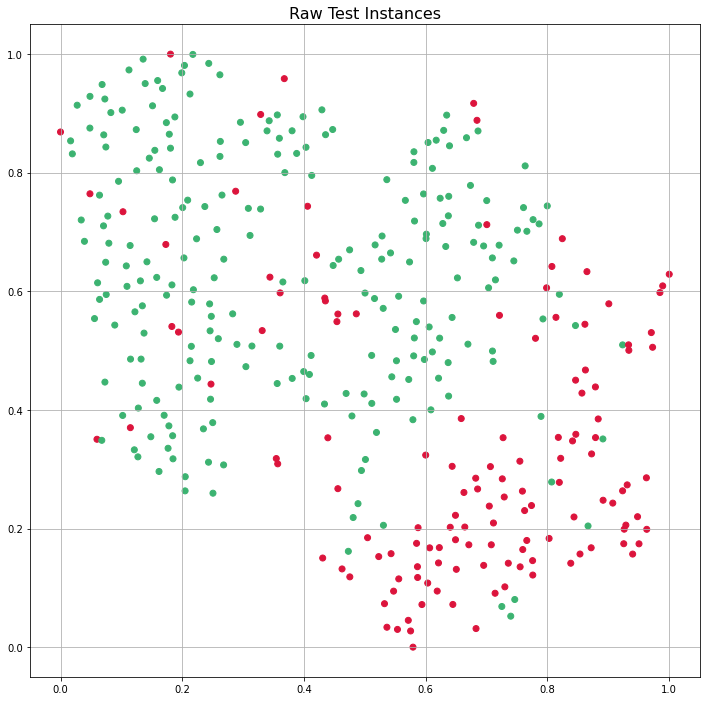

In [3]:
plot_embedding(X_train, y_train, "Raw Training Instances", f"data/{dataset_name}/raw_training_set")
plot_embedding(X_test, y_test, "Raw Test Instances", f"data/{dataset_name}/raw_test_set")

## Euclidean Distance

In [4]:
raw_ed_one_y_pred = KNeighborsClassifier(n_neighbors=1,
                                         metric="euclidean",
                                         n_jobs=-1).fit(X_train, y_train).predict(X_test)
print(f"1-NN Accuracy: {accuracy_score(y_test, raw_ed_one_y_pred):.4f}")

raw_ed_three_y_pred = KNeighborsClassifier(n_neighbors=3,
                                           metric="euclidean",
                                           n_jobs=-1).fit(X_train, y_train).predict(X_test)
print(f"3-NN Accuracy: {accuracy_score(y_test, raw_ed_three_y_pred):.4f}")

1-NN Accuracy: 0.8459
3-NN Accuracy: 0.8514


## DTW Distance

In [5]:
dtw_one_y_pred = KNeighborsClassifier(n_neighbors=1,
                                      metric=distance_time_warping,
                                      n_jobs=-1).fit(X_train, y_train).predict(X_test)
print(f"1-NN Accuracy: {accuracy_score(y_test, dtw_one_y_pred):.4f}")

dtw_three_y_pred = KNeighborsClassifier(n_neighbors=3,
                                        metric=distance_time_warping,
                                        n_jobs=-1).fit(X_train, y_train).predict(X_test)
print(f"3-NN Accuracy: {accuracy_score(y_test, dtw_three_y_pred):.4f}")

1-NN Accuracy: 0.8162
3-NN Accuracy: 0.8432
